# **Linear Regression Assignment**

**Problem Statement:**

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

 

**Essentially, the company wants:**

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# **Steps are:**
1. Reading, understanding and visualising the data.
2. Preparing the data for modelling (train-test split, rescaling etc.,)
3. Training the model
4. Residual Analysis
5. Predictions and evaluation on the test set.

# **1. Reading and understanding the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings. filterwarnings('ignore')

In [679]:
# read the data
bikes = pd.read_csv("https://raw.githubusercontent.com/DevalapalleJaswanth/bikesharingdataset/main/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bikes.shape

(730, 16)

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Removing "instant" column since it is serial number.
bikes.pop("instant") 

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

In [ ]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


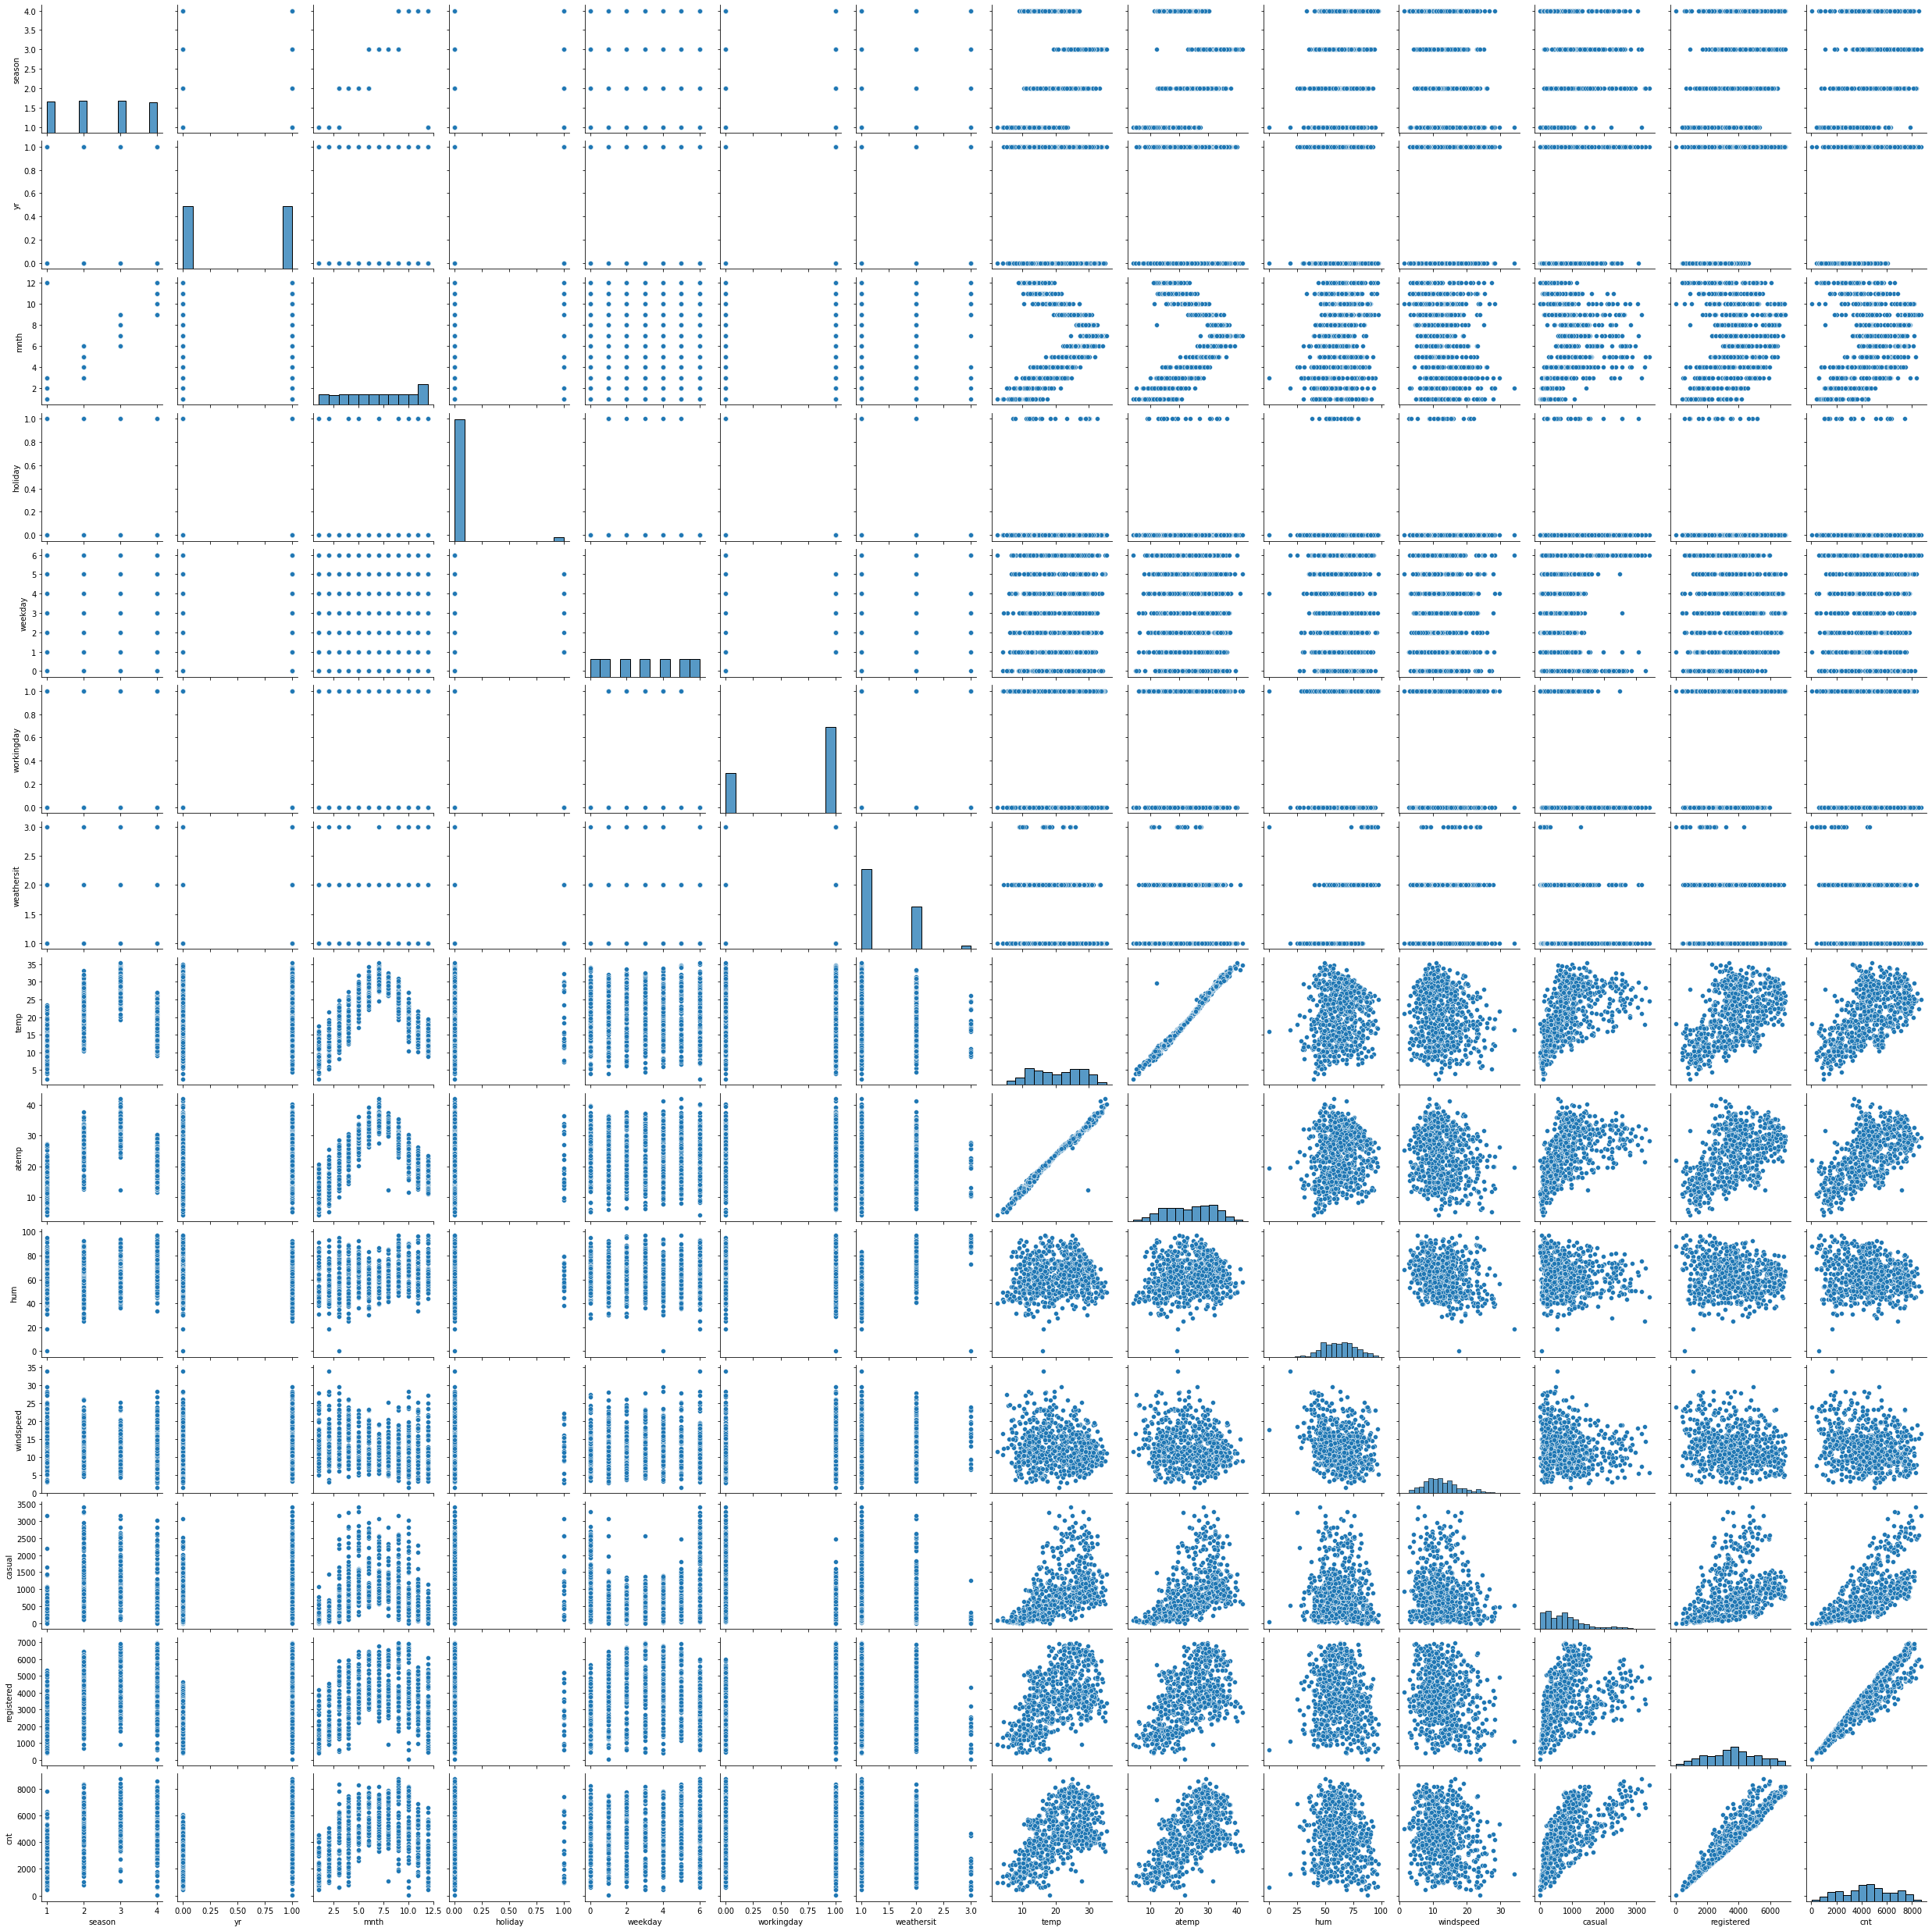

In [ ]:
# visualising the numeric
sns.pairplot(bikes)
plt.show()

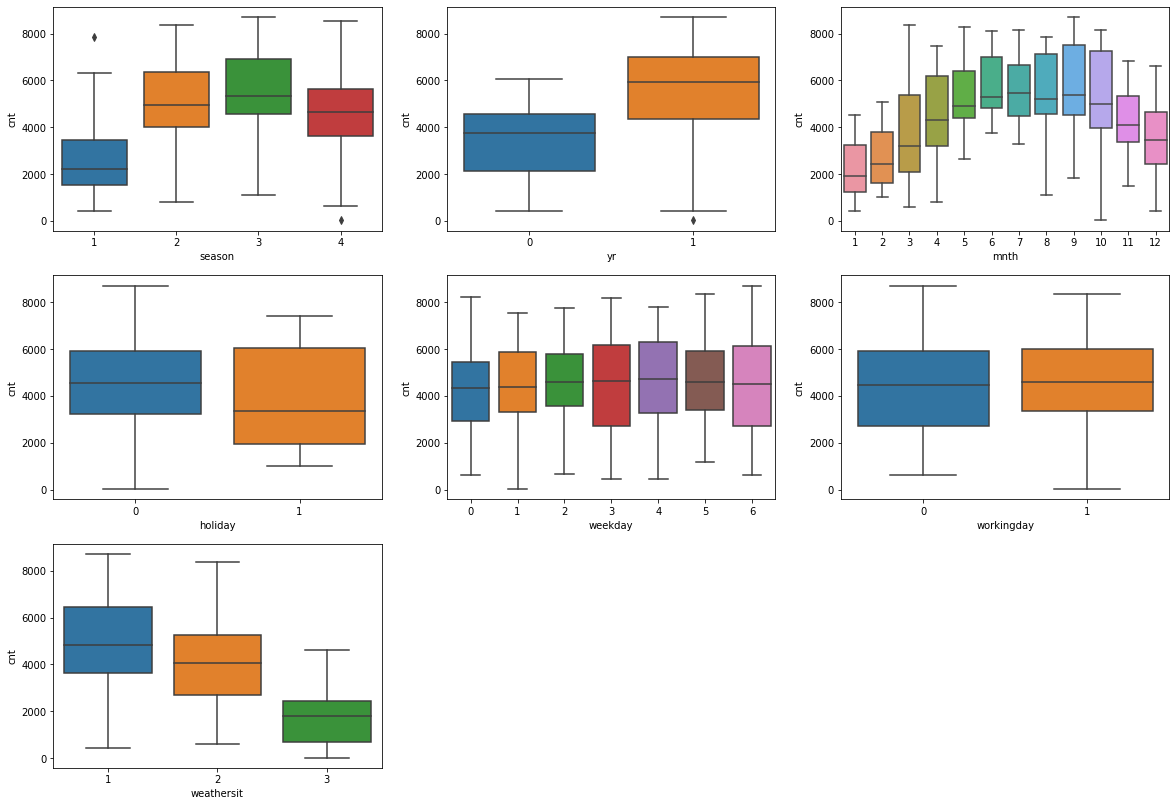

In [ ]:
# visualising categorical variables

plt.figure(figsize=(20,14))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikes)
plt.show()

**Observations:**
1. "cnt" is high in '2' and '3' seasons.
2. "cnt" is high mid of the year and is less at the end, which can be visualised in plot between "cnt" and "mnth" .
3. "cnt"  also depends on weather situation. 

    

# **2. Preparing the data for Modeling**

* Encoding
    1. Converting binary variables to 1 or 0 
    2. Other categorical variables to dummy variables

* Splitting into train and test
* Rescaling of variables

**Dummy variables**

In [ ]:
# creating Dummy variables and dropping redundaant dummy variables

weather_situation = pd.get_dummies(bikes['weathersit'], drop_first=True)
weather_situation['weathersit-2']= weather_situation.pop(2)
weather_situation['weathersit-3']= weather_situation.pop(3)
weather_situation.head()
# NOTE:
  # 00  --> weathersit-1
  # 10  --> weathersit-2
  # 01  --> weathersit-3
  

,weathersit-2,weathersit-3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [ ]:
season= pd.get_dummies(bikes['season'], drop_first=True)
season['season-2']= season.pop(2)
season['season-3']= season.pop(3)
season['season-4']= season.pop(4)
season.head()
# NOTE:
  # 000  --> season-1
  # 100  --> season-2
  # 010  --> season-3
  # 001  --> season-4
  

,season-2,season-3,season-4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
month= pd.get_dummies(bikes['mnth'], drop_first=True)
month['mnth-2']= month.pop(2)
month['mnth-3']= month.pop(3)
month['mnth-4']= month.pop(4)
month['mnth-5']= month.pop(5)
month['mnth-6']= month.pop(6)
month['mnth-7']= month.pop(7)
month['mnth-8']= month.pop(8)
month['mnth-9']= month.pop(9)
month['mnth-10']= month.pop(10)
month['mnth-11']= month.pop(11)
month['mnth-12']= month.pop(12)
month.head()

# NOTE:
  # 00000000000  --> mnth-1
  # 10000000000  --> mnth-2
  # 01000000000  --> mnth-3
  # 00100000000  --> mnth-4
  # 00010000000  --> mnth-5
  # 00001000000  --> mnth-6
  # 00000100000  --> mnth-7
  # 00000010000  --> mnth-8
  # 00000001000  --> mnth-9
  # 00000000100  --> mnth-10
  # 00000000010  --> mnth-11
  # 00000000001  --> mnth-12

,mnth-2,mnth-3,mnth-4,mnth-5,mnth-6,mnth-7,mnth-8,mnth-9,mnth-10,mnth-11,mnth-12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
weekday= pd.get_dummies(bikes['weekday'], drop_first=True)
weekday['weekday-1']= weekday.pop(1)    # 100000  --> weekday-1
weekday['weekday-2']= weekday.pop(2)    # 010000  --> weekday-2
weekday['weekday-3']= weekday.pop(3)    # 001000  --> weekday-3
weekday['weekday-4']= weekday.pop(4)    # 000100  --> weekday-4
weekday['weekday-5']= weekday.pop(5)    # 000010  --> weekday-5
weekday['weekday-6']= weekday.pop(6)    # 000001  --> weekday-6  
weekday.head()

# NOTE:
  # 000000  --> weekday-0
  # 100000  --> weekday-1
  # 010000  --> weekday-2
  # 001000  --> weekday-3
  # 000100  --> weekday-4
  # 000010  --> weekday-5
  # 000001  --> weekday-6 

,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [ ]:
# concat the dummy dataframe with the original one
bikes=pd.concat([bikes,season,month,weekday,weather_situation], axis=1)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,1,1,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,1,0
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,...,0,0,0,1,0,0,0,0,0,0
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
bikes =bikes.drop('season', axis=1)
bikes =bikes.drop('mnth', axis=1)
bikes =bikes.drop('weekday', axis=1)
bikes =bikes.drop('weathersit', axis=1)

# Removing date column
bikes =bikes.drop('dteday', axis=1)

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Removing casual and registered columns, since cnt= casual + registered
bikes =bikes.drop('casual', axis=1)
bikes =bikes.drop('registered', axis=1)

bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season-2,season-3,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


**Splitting into train and test**

In [ ]:
df_train, df_test= train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


**Rescaling the Features:**

Scaling of variables is an important step because, as you may have noticed, the variable ‘temp’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.

How to do it:

1. Min-Max scaling (normalisation): Between 0 and 1
2. Standardisation (mean=0, sigma=1)

In [ ]:
# normalisation: (x-xmin)/(xmax-xmin)
# standardisation:  (x- mu)/ sigma

In [ ]:
#  using Normalisation method

# 1. Initialise an object
scaler= MinMaxScaler()

# 2. Create a list of numeric variables
num_vars= ['temp','atemp','hum','windspeed','cnt']

# 3. Fit on data
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season-2,season-3,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


# **3. Training the model**

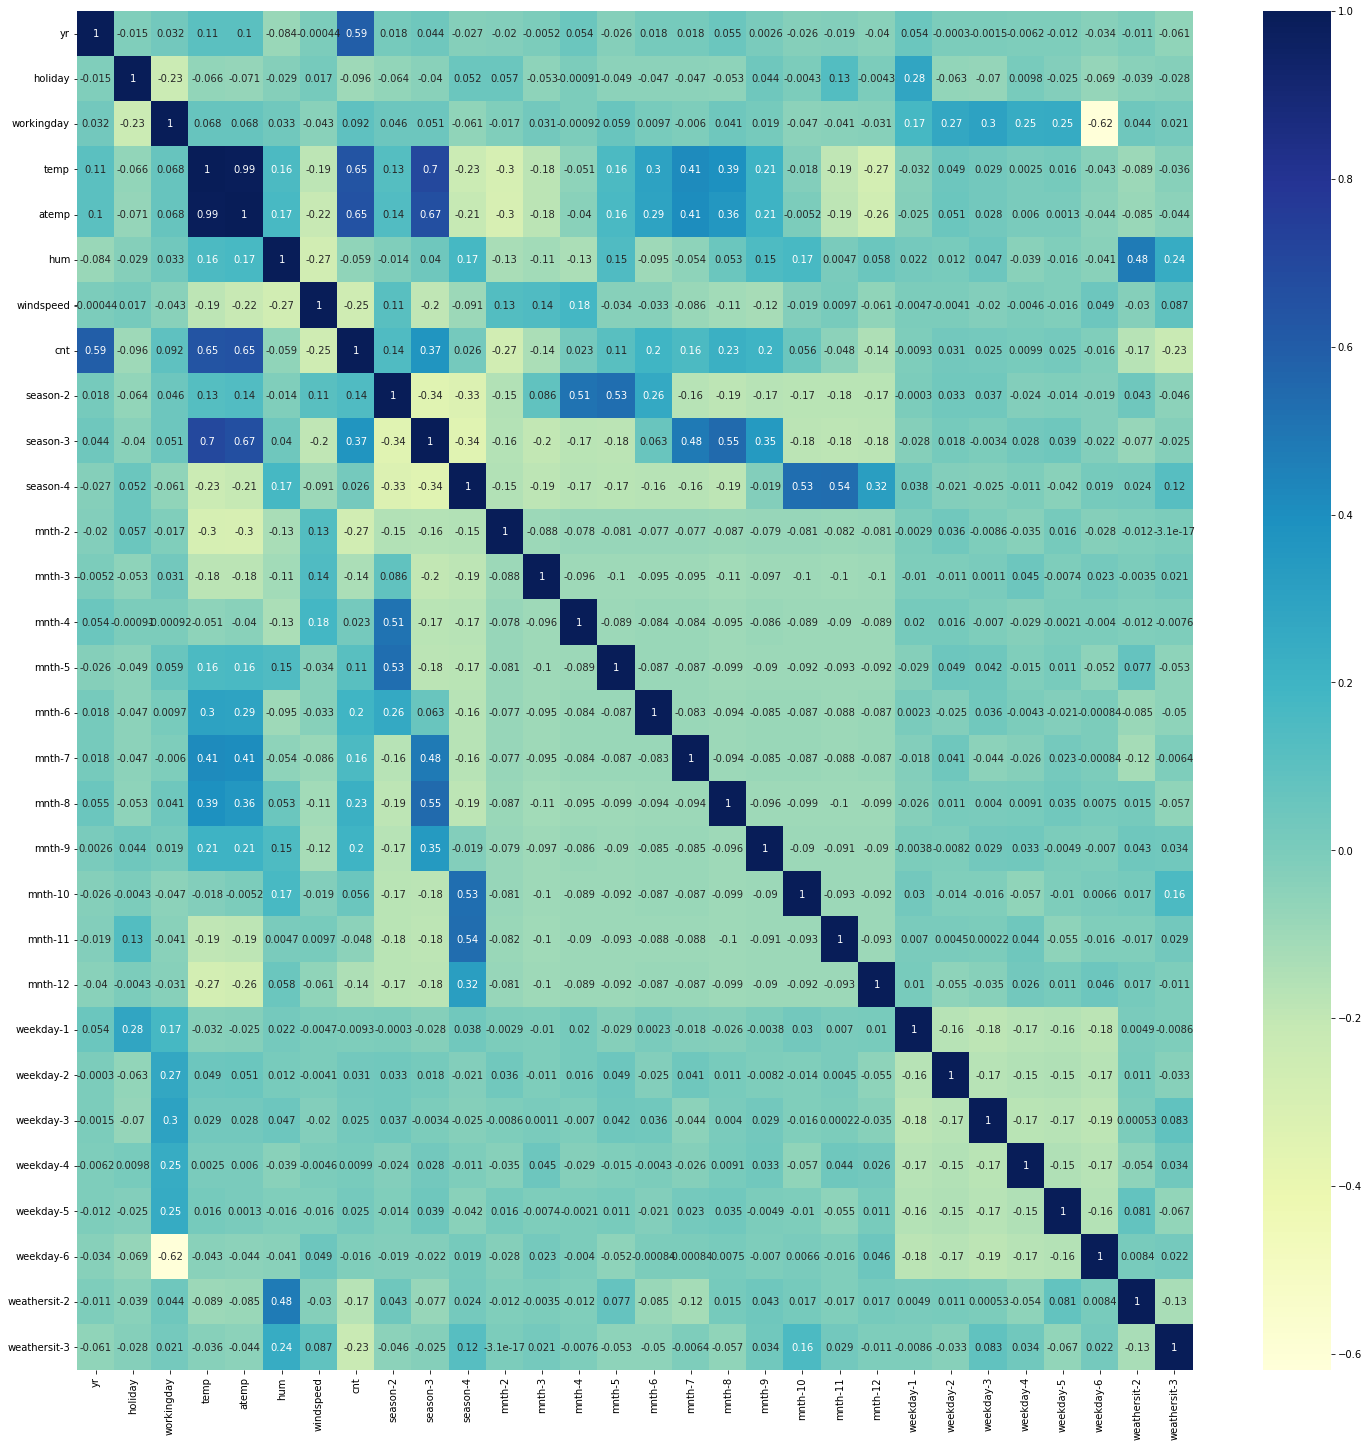

In [ ]:
# heatmap

plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Bottom-up Approach:**

The bottom-up approach was just to give you an idea of how the parameters change when the number of variables is increased. More generally, you first build a model using all  and then try to improve the model by dropping some of them.

In [ ]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season-2', 'season-3', 'season-4', 'mnth-2', 'mnth-3', 'mnth-4',
       'mnth-5', 'mnth-6', 'mnth-7', 'mnth-8', 'mnth-9', 'mnth-10', 'mnth-11',
       'mnth-12', 'weekday-1', 'weekday-2', 'weekday-3', 'weekday-4',
       'weekday-5', 'weekday-6', 'weathersit-2', 'weathersit-3'],
      dtype='object')

In [ ]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# adding a constant
X_train_sm= sm.add_constant(X_train)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.81e-180
Time:                        16:38:40   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1758      0.030      5.774      0.000       0.116       0.236
yr               0.2325      0.008     28.794      0.000       0.217       0.248
holiday         -0.0416      0.024     -1.758      0.079      -0.088       0.005
workingday       0.0438      0.009      4.666      0.000       0.025       0.062
temp             0.3880      0.142      2.727      0.007       0.108       0.668
atemp            0.0590      0.138      0.426      0.670      -0.213       0.331
hum             -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed       -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season-2         0.0877      0.024      3.713      0.000       0.041       0.134
season-3         0.0454      0.030      1.511      0.131      -0.014       0.104
season-4         0.1524      0.026      5.866      0.000       0.101       0.203
mnth-2           0.0307      0.021      1.489      0.137      -0.010       0.071
mnth-3           0.0646      0.022      2.886      0.004       0.021       0.109
mnth-4           0.0631      0.034      1.876      0.061      -0.003       0.129
mnth-5           0.0886      0.036      2.446      0.015       0.017       0.160
mnth-6           0.0691      0.039      1.776      0.076      -0.007       0.145
mnth-7           0.0304      0.044      0.692      0.489      -0.056       0.117
mnth-8           0.0853      0.042      2.038      0.042       0.003       0.168
mnth-9           0.1498      0.037      4.006      0.000       0.076       0.223
mnth-10          0.0708      0.035      2.050      0.041       0.003       0.139
mnth-11          0.0232      0.033      0.707      0.480      -0.041       0.088
mnth-12          0.0188      0.027      0.708      0.479      -0.033       0.071
weekday-1       -0.0101      0.010     -1.033      0.302      -0.029       0.009
weekday-2       -0.0069      0.011     -0.616      0.538      -0.029       0.015
weekday-3        0.0057      0.011      0.538      0.591      -0.015       0.026
weekday-4        0.0018      0.011      0.168      0.867      -0.020       0.023
weekday-5        0.0116      0.011      1.029      0.304      -0.011       0.034
weekday-6        0.0542      0.015      3.729      0.000       0.026       0.083
weathersit-2    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
weathersit-3    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.57e+15
===============

**VIF:**

Variable inflation factor or VIF.

Used to check multicollinearity


In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
24,weekday-4,inf
2,workingday,inf
23,weekday-3,inf
22,weekday-2,inf
21,weekday-1,inf
25,weekday-5,inf
1,holiday,inf
3,temp,446.42
4,atemp,383.20
5,hum,20.80


 **Judge the insignificant variables, the p-values and the VIFs:**

 1. High p-vale, high VIF --> Remove the feature

 2. High-Low:
     * High p-vale, low VIF --> Remove   these first

     * low p-vale, high VIF --> Remove these after above

 3. Low p-value, low VIF --> Keep the feature

In [ ]:
# Taking 5% confidence error (i.e) p-value < 0.05
# VIF value should be less than 5

In [ ]:
# drop weekday-4
X=X_train.drop('weekday-4',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.81e-180
Time:                        16:38:41   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1758      0.030      5.774      0.000       0.116       0.236
yr               0.2325      0.008     28.794      0.000       0.217       0.248
holiday         -0.0398      0.030     -1.323      0.187      -0.099       0.019
workingday       0.0456      0.015      3.004      0.003       0.016       0.075
temp             0.3880      0.142      2.727      0.007       0.108       0.668
atemp            0.0590      0.138      0.426      0.670      -0.213       0.331
hum             -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed       -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season-2         0.0877      0.024      3.713      0.000       0.041       0.134
season-3         0.0454      0.030      1.511      0.131      -0.014       0.104
season-4         0.1524      0.026      5.866      0.000       0.101       0.203
mnth-2           0.0307      0.021      1.489      0.137      -0.010       0.071
mnth-3           0.0646      0.022      2.886      0.004       0.021       0.109
mnth-4           0.0631      0.034      1.876      0.061      -0.003       0.129
mnth-5           0.0886      0.036      2.446      0.015       0.017       0.160
mnth-6           0.0691      0.039      1.776      0.076      -0.007       0.145
mnth-7           0.0304      0.044      0.692      0.489      -0.056       0.117
mnth-8           0.0853      0.042      2.038      0.042       0.003       0.168
mnth-9           0.1498      0.037      4.006      0.000       0.076       0.223
mnth-10          0.0708      0.035      2.050      0.041       0.003       0.139
mnth-11          0.0232      0.033      0.707      0.480      -0.041       0.088
mnth-12          0.0188      0.027      0.708      0.479      -0.033       0.071
weekday-1       -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday-2       -0.0087      0.015     -0.564      0.573      -0.039       0.022
weekday-3        0.0038      0.015      0.261      0.794      -0.025       0.033
weekday-5        0.0097      0.016      0.623      0.534      -0.021       0.040
weekday-6        0.0542      0.015      3.729      0.000       0.026       0.083
weathersit-2    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
weathersit-3    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                         92.4
==============================================================================

Notes:
[1] Stand

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,446.42
4,atemp,383.20
5,hum,20.80
8,season-3,15.37
16,mnth-8,10.92
9,season-4,10.83
15,mnth-7,9.54
2,workingday,9.31
7,season-2,8.94
14,mnth-6,7.43


In [ ]:
# drop atemp
X=X.drop('atemp',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.00e-181
Time:                        16:38:41   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1763      0.030      5.797      0.000       0.117       0.236
yr               0.2324      0.008     28.819      0.000       0.217       0.248
holiday         -0.0404      0.030     -1.346      0.179      -0.099       0.019
workingday       0.0457      0.015      3.016      0.003       0.016       0.075
temp             0.4454      0.046      9.628      0.000       0.354       0.536
hum             -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed       -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season-2         0.0878      0.024      3.721      0.000       0.041       0.134
season-3         0.0448      0.030      1.496      0.135      -0.014       0.104
season-4         0.1525      0.026      5.873      0.000       0.101       0.203
mnth-2           0.0309      0.021      1.497      0.135      -0.010       0.071
mnth-3           0.0646      0.022      2.888      0.004       0.021       0.109
mnth-4           0.0633      0.034      1.885      0.060      -0.003       0.129
mnth-5           0.0880      0.036      2.433      0.015       0.017       0.159
mnth-6           0.0679      0.039      1.752      0.080      -0.008       0.144
mnth-7           0.0295      0.044      0.672      0.502      -0.057       0.116
mnth-8           0.0837      0.042      2.009      0.045       0.002       0.166
mnth-9           0.1493      0.037      3.997      0.000       0.076       0.223
mnth-10          0.0709      0.034      2.055      0.040       0.003       0.139
mnth-11          0.0234      0.033      0.714      0.476      -0.041       0.088
mnth-12          0.0190      0.026      0.718      0.473      -0.033       0.071
weekday-1       -0.0118      0.015     -0.780      0.436      -0.042       0.018
weekday-2       -0.0088      0.015     -0.571      0.568      -0.039       0.022
weekday-3        0.0036      0.015      0.248      0.804      -0.025       0.032
weekday-5        0.0091      0.016      0.588      0.557      -0.021       0.040
weekday-6        0.0542      0.015      3.732      0.000       0.026       0.083
weathersit-2    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit-3    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,46.87
4,hum,20.66
7,season-3,15.35
15,mnth-8,10.83
8,season-4,10.83
14,mnth-7,9.52
2,workingday,9.30
6,season-2,8.94
13,mnth-6,7.40
16,mnth-9,7.28


In [ ]:
# drop weekday-3
X=X.drop('weekday-3',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.95e-182
Time:                        16:38:41   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1761      0.030      5.798      0.000       0.116       0.236
yr               0.2325      0.008     28.849      0.000       0.217       0.248
holiday         -0.0387      0.029     -1.326      0.185      -0.096       0.019
workingday       0.0477      0.013      3.717      0.000       0.022       0.073
temp             0.4452      0.046      9.635      0.000       0.354       0.536
hum             -0.1512      0.038     -3.927      0.000      -0.227      -0.076
windspeed       -0.1860      0.026     -7.234      0.000      -0.237      -0.136
season-2         0.0877      0.024      3.721      0.000       0.041       0.134
season-3         0.0446      0.030      1.490      0.137      -0.014       0.103
season-4         0.1525      0.026      5.878      0.000       0.102       0.203
mnth-2           0.0310      0.021      1.503      0.133      -0.010       0.071
mnth-3           0.0646      0.022      2.889      0.004       0.021       0.108
mnth-4           0.0635      0.034      1.894      0.059      -0.002       0.129
mnth-5           0.0882      0.036      2.442      0.015       0.017       0.159
mnth-6           0.0682      0.039      1.763      0.079      -0.008       0.144
mnth-7           0.0298      0.044      0.680      0.497      -0.056       0.116
mnth-8           0.0840      0.042      2.019      0.044       0.002       0.166
mnth-9           0.1495      0.037      4.007      0.000       0.076       0.223
mnth-10          0.0709      0.034      2.059      0.040       0.003       0.139
mnth-11          0.0234      0.033      0.712      0.477      -0.041       0.088
mnth-12          0.0189      0.026      0.714      0.475      -0.033       0.071
weekday-1       -0.0137      0.013     -1.065      0.288      -0.039       0.012
weekday-2       -0.0108      0.013     -0.821      0.412      -0.037       0.015
weekday-5        0.0072      0.013      0.537      0.592      -0.019       0.033
weekday-6        0.0542      0.015      3.737      0.000       0.026       0.083
weathersit-2    -0.0595      0.010     -5.712      0.000      -0.080      -0.039
weathersit-3    -0.2557      0.026     -9.706      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       84.105   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.381
Skew:                          -0.802   Prob(JB):                     2.10e-51
Kurtosis:                       5.900   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,46.86
4,hum,20.65
7,season-3,15.33
8,season-4,10.83
15,mnth-8,10.82
14,mnth-7,9.51
6,season-2,8.94
13,mnth-6,7.39
16,mnth-9,7.28
12,mnth-5,7.14


In [ ]:
# drop weekday-5
X=X.drop('weekday-5',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.19e-183
Time:                        16:38:41   Log-Likelihood:                 526.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1765      0.030      5.816      0.000       0.117       0.236
yr               0.2324      0.008     28.865      0.000       0.217       0.248
holiday         -0.0363      0.029     -1.260      0.208      -0.093       0.020
workingday       0.0499      0.012      4.105      0.000       0.026       0.074
temp             0.4448      0.046      9.635      0.000       0.354       0.536
hum             -0.1518      0.038     -3.949      0.000      -0.227      -0.076
windspeed       -0.1861      0.026     -7.241      0.000      -0.237      -0.136
season-2         0.0876      0.024      3.717      0.000       0.041       0.134
season-3         0.0446      0.030      1.493      0.136      -0.014       0.103
season-4         0.1526      0.026      5.889      0.000       0.102       0.204
mnth-2           0.0313      0.021      1.518      0.130      -0.009       0.072
mnth-3           0.0646      0.022      2.893      0.004       0.021       0.108
mnth-4           0.0639      0.034      1.907      0.057      -0.002       0.130
mnth-5           0.0886      0.036      2.454      0.014       0.018       0.159
mnth-6           0.0684      0.039      1.769      0.078      -0.008       0.144
mnth-7           0.0304      0.044      0.696      0.487      -0.055       0.116
mnth-8           0.0844      0.042      2.030      0.043       0.003       0.166
mnth-9           0.1495      0.037      4.011      0.000       0.076       0.223
mnth-10          0.0712      0.034      2.069      0.039       0.004       0.139
mnth-11          0.0230      0.033      0.700      0.484      -0.041       0.087
mnth-12          0.0190      0.026      0.718      0.473      -0.033       0.071
weekday-1       -0.0160      0.012     -1.304      0.193      -0.040       0.008
weekday-2       -0.0130      0.012     -1.044      0.297      -0.038       0.011
weekday-6        0.0542      0.015      3.739      0.000       0.026       0.083
weathersit-2    -0.0591      0.010     -5.692      0.000      -0.079      -0.039
weathersit-3    -0.2567      0.026     -9.771      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       83.749   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.918
Skew:                          -0.798   Prob(JB):                     2.65e-51
Kurtosis:                       5.901   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,46.85
4,hum,20.64
7,season-3,15.33
8,season-4,10.83
15,mnth-8,10.81
14,mnth-7,9.50
6,season-2,8.94
13,mnth-6,7.39
16,mnth-9,7.28
12,mnth-5,7.14


In [ ]:
# drop mnth-7
X=X.drop('mnth-7',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.71e-184
Time:                        16:38:41   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1778      0.030      5.873      0.000       0.118       0.237
yr               0.2319      0.008     28.928      0.000       0.216       0.248
holiday         -0.0379      0.029     -1.318      0.188      -0.094       0.019
workingday       0.0494      0.012      4.072      0.000       0.026       0.073
temp             0.4636      0.037     12.383      0.000       0.390       0.537
hum             -0.1553      0.038     -4.079      0.000      -0.230      -0.081
windspeed       -0.1859      0.026     -7.239      0.000      -0.236      -0.135
season-2         0.0939      0.022      4.316      0.000       0.051       0.137
season-3         0.0570      0.024      2.372      0.018       0.010       0.104
season-4         0.1582      0.025      6.419      0.000       0.110       0.207
mnth-2           0.0270      0.020      1.374      0.170      -0.012       0.066
mnth-3           0.0557      0.018      3.043      0.002       0.020       0.092
mnth-4           0.0494      0.026      1.882      0.060      -0.002       0.101
mnth-5           0.0716      0.027      2.693      0.007       0.019       0.124
mnth-6           0.0467      0.023      2.047      0.041       0.002       0.091
mnth-8           0.0584      0.018      3.198      0.001       0.023       0.094
mnth-9           0.1272      0.019      6.671      0.000       0.090       0.165
mnth-10          0.0573      0.028      2.045      0.041       0.002       0.112
mnth-11          0.0114      0.028      0.404      0.686      -0.044       0.067
mnth-12          0.0102      0.023      0.440      0.660      -0.035       0.056
weekday-1       -0.0158      0.012     -1.292      0.197      -0.040       0.008
weekday-2       -0.0128      0.012     -1.026      0.305      -0.037       0.012
weekday-6        0.0542      0.014      3.738      0.000       0.026       0.083
weathersit-2    -0.0587      0.010     -5.666      0.000      -0.079      -0.038
weathersit-3    -0.2558      0.026     -9.754      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       81.485   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.632
Skew:                          -0.784   Prob(JB):                     7.47e-49
Kurtosis:                       5.824   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,30.32
4,hum,20.31
7,season-3,9.89
8,season-4,9.79
6,season-2,7.63
2,workingday,5.74
5,windspeed,4.46
17,mnth-11,4.46
16,mnth-10,4.32
12,mnth-5,3.89


In [ ]:
# drop mnth-11
X=X.drop('mnth-11',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.60e-185
Time:                        16:38:42   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.030      5.943      0.000       0.120       0.238
yr               0.2319      0.008     28.950      0.000       0.216       0.248
holiday         -0.0363      0.028     -1.277      0.202      -0.092       0.020
workingday       0.0494      0.012      4.080      0.000       0.026       0.073
temp             0.4615      0.037     12.460      0.000       0.389       0.534
hum             -0.1544      0.038     -4.065      0.000      -0.229      -0.080
windspeed       -0.1847      0.025     -7.245      0.000      -0.235      -0.135
season-2         0.0942      0.022      4.339      0.000       0.052       0.137
season-3         0.0580      0.024      2.427      0.016       0.011       0.105
season-4         0.1658      0.016     10.398      0.000       0.134       0.197
mnth-2           0.0255      0.019      1.322      0.187      -0.012       0.063
mnth-3           0.0544      0.018      3.021      0.003       0.019       0.090
mnth-4           0.0480      0.026      1.847      0.065      -0.003       0.099
mnth-5           0.0706      0.026      2.670      0.008       0.019       0.123
mnth-6           0.0458      0.023      2.019      0.044       0.001       0.090
mnth-8           0.0572      0.018      3.178      0.002       0.022       0.093
mnth-9           0.1242      0.018      7.073      0.000       0.090       0.159
mnth-10          0.0488      0.018      2.649      0.008       0.013       0.085
mnth-12          0.0037      0.017      0.221      0.825      -0.029       0.036
weekday-1       -0.0161      0.012     -1.324      0.186      -0.040       0.008
weekday-2       -0.0129      0.012     -1.037      0.300      -0.037       0.012
weekday-6        0.0541      0.014      3.735      0.000       0.026       0.083
weathersit-2    -0.0589      0.010     -5.697      0.000      -0.079      -0.039
weathersit-3    -0.2559      0.026     -9.764      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       81.161   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.909
Skew:                          -0.780   Prob(JB):                     1.07e-48
Kurtosis:                       5.821   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,29.82
4,hum,19.62
7,season-3,9.77
6,season-2,7.62
2,workingday,5.73
5,windspeed,4.33
8,season-4,4.00
12,mnth-5,3.86
11,mnth-4,3.42
13,mnth-6,2.56


In [ ]:
# drop mnth-12
X=X.drop('mnth-12',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.23e-186
Time:                        16:38:42   Log-Likelihood:                 526.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1795      0.030      5.991      0.000       0.121       0.238
yr               0.2318      0.008     28.978      0.000       0.216       0.248
holiday         -0.0366      0.028     -1.288      0.198      -0.092       0.019
workingday       0.0495      0.012      4.091      0.000       0.026       0.073
temp             0.4606      0.037     12.517      0.000       0.388       0.533
hum             -0.1537      0.038     -4.066      0.000      -0.228      -0.079
windspeed       -0.1848      0.025     -7.256      0.000      -0.235      -0.135
season-2         0.0941      0.022      4.339      0.000       0.051       0.137
season-3         0.0579      0.024      2.425      0.016       0.011       0.105
season-4         0.1665      0.016     10.654      0.000       0.136       0.197
mnth-2           0.0248      0.019      1.305      0.192      -0.013       0.062
mnth-3           0.0538      0.018      3.026      0.003       0.019       0.089
mnth-4           0.0476      0.026      1.838      0.067      -0.003       0.099
mnth-5           0.0702      0.026      2.663      0.008       0.018       0.122
mnth-6           0.0455      0.023      2.012      0.045       0.001       0.090
mnth-8           0.0569      0.018      3.173      0.002       0.022       0.092
mnth-9           0.1237      0.017      7.119      0.000       0.090       0.158
mnth-10          0.0475      0.017      2.724      0.007       0.013       0.082
weekday-1       -0.0161      0.012     -1.325      0.186      -0.040       0.008
weekday-2       -0.0130      0.012     -1.048      0.295      -0.037       0.011
weekday-6        0.0542      0.014      3.748      0.000       0.026       0.083
weathersit-2    -0.0590      0.010     -5.723      0.000      -0.079      -0.039
weathersit-3    -0.2561      0.026     -9.793      0.000      -0.307      -0.205
==============================================================================
Omnibus:                       81.484   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.297
Skew:                          -0.783   Prob(JB):                     5.36e-49
Kurtosis:                       5.830   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,29.57
4,hum,18.61
7,season-3,9.77
6,season-2,7.62
2,workingday,5.71
5,windspeed,4.32
12,mnth-5,3.84
8,season-4,3.82
11,mnth-4,3.40
13,mnth-6,2.55


In [ ]:
# drop weekday-2
X=X.drop('weekday-2',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.75e-187
Time:                        16:38:42   Log-Likelihood:                 525.90
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -914.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1810      0.030      6.046      0.000       0.122       0.240
yr               0.2318      0.008     28.975      0.000       0.216       0.248
holiday         -0.0389      0.028     -1.374      0.170      -0.095       0.017
workingday       0.0463      0.012      3.954      0.000       0.023       0.069
temp             0.4597      0.037     12.493      0.000       0.387       0.532
hum             -0.1546      0.038     -4.092      0.000      -0.229      -0.080
windspeed       -0.1852      0.025     -7.272      0.000      -0.235      -0.135
season-2         0.0936      0.022      4.317      0.000       0.051       0.136
season-3         0.0575      0.024      2.410      0.016       0.011       0.104
season-4         0.1660      0.016     10.630      0.000       0.135       0.197
mnth-2           0.0237      0.019      1.248      0.213      -0.014       0.061
mnth-3           0.0539      0.018      3.028      0.003       0.019       0.089
mnth-4           0.0475      0.026      1.833      0.067      -0.003       0.098
mnth-5           0.0703      0.026      2.665      0.008       0.018       0.122
mnth-6           0.0463      0.023      2.049      0.041       0.002       0.091
mnth-8           0.0574      0.018      3.201      0.001       0.022       0.093
mnth-9           0.1243      0.017      7.154      0.000       0.090       0.158
mnth-10          0.0474      0.017      2.721      0.007       0.013       0.082
weekday-1       -0.0131      0.012     -1.109      0.268      -0.036       0.010
weekday-6        0.0541      0.014      3.739      0.000       0.026       0.082
weathersit-2    -0.0589      0.010     -5.706      0.000      -0.079      -0.039
weathersit-3    -0.2547      0.026     -9.751      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       81.872   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.683
Skew:                          -0.779   Prob(JB):                     2.20e-50
Kurtosis:                       5.887   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,29.56
4,hum,18.61
7,season-3,9.77
6,season-2,7.61
2,workingday,5.35
5,windspeed,4.32
12,mnth-5,3.84
8,season-4,3.82
11,mnth-4,3.40
13,mnth-6,2.55


In [ ]:
# drop weekday-1
X=X.drop('weekday-1',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.28e-188
Time:                        16:38:42   Log-Likelihood:                 525.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1820      0.030      6.083      0.000       0.123       0.241
yr               0.2313      0.008     28.958      0.000       0.216       0.247
holiday         -0.0491      0.027     -1.833      0.067      -0.102       0.004
workingday       0.0437      0.011      3.807      0.000       0.021       0.066
temp             0.4619      0.037     12.569      0.000       0.390       0.534
hum             -0.1567      0.038     -4.151      0.000      -0.231      -0.083
windspeed       -0.1855      0.025     -7.280      0.000      -0.236      -0.135
season-2         0.0929      0.022      4.284      0.000       0.050       0.135
season-3         0.0565      0.024      2.368      0.018       0.010       0.103
season-4         0.1656      0.016     10.605      0.000       0.135       0.196
mnth-2           0.0238      0.019      1.256      0.210      -0.013       0.061
mnth-3           0.0538      0.018      3.021      0.003       0.019       0.089
mnth-4           0.0474      0.026      1.828      0.068      -0.004       0.098
mnth-5           0.0707      0.026      2.682      0.008       0.019       0.123
mnth-6           0.0458      0.023      2.025      0.043       0.001       0.090
mnth-8           0.0576      0.018      3.213      0.001       0.022       0.093
mnth-9           0.1247      0.017      7.181      0.000       0.091       0.159
mnth-10          0.0467      0.017      2.680      0.008       0.012       0.081
weekday-6        0.0540      0.014      3.732      0.000       0.026       0.082
weathersit-2    -0.0586      0.010     -5.680      0.000      -0.079      -0.038
weathersit-3    -0.2538      0.026     -9.720      0.000      -0.305      -0.203
==============================================================================
Omnibus:                       80.793   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.887
Skew:                          -0.768   Prob(JB):                     8.90e-50
Kurtosis:                       5.876   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,29.46
4,hum,18.58
7,season-3,9.76
6,season-2,7.61
2,workingday,5.13
5,windspeed,4.32
12,mnth-5,3.84
8,season-4,3.82
11,mnth-4,3.40
13,mnth-6,2.55


In [ ]:
# drop mnth-2
X=X.drop('mnth-2',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.29e-188
Time:                        16:38:42   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1911      0.029      6.575      0.000       0.134       0.248
yr               0.2312      0.008     28.931      0.000       0.215       0.247
holiday         -0.0491      0.027     -1.830      0.068      -0.102       0.004
workingday       0.0435      0.011      3.787      0.000       0.021       0.066
temp             0.4640      0.037     12.633      0.000       0.392       0.536
hum             -0.1596      0.038     -4.234      0.000      -0.234      -0.086
windspeed       -0.1834      0.025     -7.210      0.000      -0.233      -0.133
season-2         0.0895      0.022      4.157      0.000       0.047       0.132
season-3         0.0481      0.023      2.100      0.036       0.003       0.093
season-4         0.1574      0.014     11.107      0.000       0.130       0.185
mnth-3           0.0462      0.017      2.757      0.006       0.013       0.079
mnth-4           0.0417      0.026      1.634      0.103      -0.008       0.092
mnth-5           0.0653      0.026      2.510      0.012       0.014       0.116
mnth-6           0.0417      0.022      1.863      0.063      -0.002       0.086
mnth-8           0.0569      0.018      3.174      0.002       0.022       0.092
mnth-9           0.1243      0.017      7.153      0.000       0.090       0.158
mnth-10          0.0464      0.017      2.659      0.008       0.012       0.081
weekday-6        0.0531      0.014      3.673      0.000       0.025       0.081
weathersit-2    -0.0584      0.010     -5.658      0.000      -0.079      -0.038
weathersit-3    -0.2522      0.026     -9.664      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       81.126   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.386
Skew:                          -0.773   Prob(JB):                     1.14e-49
Kurtosis:                       5.866   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,29.25
4,hum,17.98
7,season-3,9.03
6,season-2,7.47
2,workingday,5.10
5,windspeed,4.13
11,mnth-5,3.74
10,mnth-4,3.33
8,season-4,3.22
12,mnth-6,2.51


In [ ]:
# drop mnth-4
X=X.drop('mnth-4',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.84e-189
Time:                        16:38:42   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.713      0.000       0.138       0.252
yr               0.2315      0.008     28.924      0.000       0.216       0.247
holiday         -0.0500      0.027     -1.863      0.063      -0.103       0.003
workingday       0.0433      0.011      3.770      0.000       0.021       0.066
temp             0.4690      0.037     12.791      0.000       0.397       0.541
hum             -0.1649      0.038     -4.381      0.000      -0.239      -0.091
windspeed       -0.1801      0.025     -7.091      0.000      -0.230      -0.130
season-2         0.1141      0.015      7.417      0.000       0.084       0.144
season-3         0.0476      0.023      2.074      0.039       0.003       0.093
season-4         0.1545      0.014     10.971      0.000       0.127       0.182
mnth-3           0.0334      0.015      2.250      0.025       0.004       0.062
mnth-5           0.0364      0.019      1.906      0.057      -0.001       0.074
mnth-6           0.0207      0.018      1.126      0.261      -0.015       0.057
mnth-8           0.0523      0.018      2.948      0.003       0.017       0.087
mnth-9           0.1210      0.017      7.000      0.000       0.087       0.155
mnth-10          0.0455      0.017      2.609      0.009       0.011       0.080
weekday-6        0.0525      0.014      3.628      0.000       0.024       0.081
weathersit-2    -0.0582      0.010     -5.628      0.000      -0.078      -0.038
weathersit-3    -0.2516      0.026     -9.626      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       82.736   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.805
Skew:                          -0.790   Prob(JB):                     2.07e-50
Kurtosis:                       5.876   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,28.98
4,hum,17.95
7,season-3,9.02
2,workingday,5.10
5,windspeed,4.05
6,season-2,3.81
8,season-4,3.17
16,weathersit-2,2.16
0,yr,2.06
10,mnth-5,1.99


In [ ]:
# drop mnth-6
X=X.drop('mnth-6',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.55e-190
Time:                        16:38:43   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1944      0.029      6.697      0.000       0.137       0.251
yr               0.2309      0.008     28.903      0.000       0.215       0.247
holiday         -0.0513      0.027     -1.912      0.057      -0.104       0.001
workingday       0.0433      0.012      3.766      0.000       0.021       0.066
temp             0.4845      0.034     14.251      0.000       0.418       0.551
hum             -0.1685      0.038     -4.492      0.000      -0.242      -0.095
windspeed       -0.1825      0.025     -7.210      0.000      -0.232      -0.133
season-2         0.1163      0.015      7.615      0.000       0.086       0.146
season-3         0.0435      0.023      1.920      0.055      -0.001       0.088
season-4         0.1524      0.014     10.916      0.000       0.125       0.180
mnth-3           0.0299      0.015      2.059      0.040       0.001       0.058
mnth-5           0.0280      0.018      1.592      0.112      -0.007       0.063
mnth-8           0.0476      0.017      2.759      0.006       0.014       0.081
mnth-9           0.1177      0.017      6.908      0.000       0.084       0.151
mnth-10          0.0435      0.017      2.505      0.013       0.009       0.078
weekday-6        0.0526      0.014      3.630      0.000       0.024       0.081
weathersit-2    -0.0578      0.010     -5.594      0.000      -0.078      -0.037
weathersit-3    -0.2513      0.026     -9.611      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       81.952   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.050
Skew:                          -0.792   Prob(JB):                     1.65e-48
Kurtosis:                       5.801   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,24.83
4,hum,17.58
7,season-3,8.80
2,workingday,5.10
5,windspeed,4.00
6,season-2,3.75
8,season-4,3.12
15,weathersit-2,2.15
0,yr,2.05
14,weekday-6,1.92


In [ ]:
# drop mnth-5
X=X.drop('mnth-5',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.46e-190
Time:                        16:38:43   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.029      6.549      0.000       0.132       0.246
yr               0.2302      0.008     28.815      0.000       0.215       0.246
holiday         -0.0523      0.027     -1.945      0.052      -0.105       0.001
workingday       0.0436      0.012      3.789      0.000       0.021       0.066
temp             0.4940      0.034     14.737      0.000       0.428       0.560
hum             -0.1609      0.037     -4.318      0.000      -0.234      -0.088
windspeed       -0.1844      0.025     -7.279      0.000      -0.234      -0.135
season-2         0.1221      0.015      8.229      0.000       0.093       0.151
season-3         0.0372      0.022      1.664      0.097      -0.007       0.081
season-4         0.1496      0.014     10.785      0.000       0.122       0.177
mnth-3           0.0255      0.014      1.789      0.074      -0.003       0.054
mnth-8           0.0472      0.017      2.730      0.007       0.013       0.081
mnth-9           0.1173      0.017      6.870      0.000       0.084       0.151
mnth-10          0.0421      0.017      2.423      0.016       0.008       0.076
weekday-6        0.0522      0.014      3.600      0.000       0.024       0.081
weathersit-2    -0.0580      0.010     -5.605      0.000      -0.078      -0.038
weathersit-3    -0.2533      0.026     -9.685      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       79.154   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.450
Skew:                          -0.786   Prob(JB):                     2.97e-44
Kurtosis:                       5.639   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,24.20
4,hum,17.51
7,season-3,8.53
2,workingday,5.09
5,windspeed,3.94
6,season-2,3.54
8,season-4,3.06
14,weathersit-2,2.15
0,yr,2.04
13,weekday-6,1.92


In [ ]:
# drop season-3
X=X.drop('season-3',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.17e-191
Time:                        16:38:43   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1897      0.029      6.557      0.000       0.133       0.247
yr               0.2291      0.008     28.725      0.000       0.213       0.245
holiday         -0.0542      0.027     -2.014      0.045      -0.107      -0.001
workingday       0.0434      0.012      3.766      0.000       0.021       0.066
temp             0.5358      0.022     24.124      0.000       0.492       0.579
hum             -0.1698      0.037     -4.599      0.000      -0.242      -0.097
windspeed       -0.1880      0.025     -7.437      0.000      -0.238      -0.138
season-2         0.1050      0.011      9.798      0.000       0.084       0.126
season-4         0.1384      0.012     11.390      0.000       0.115       0.162
mnth-3           0.0208      0.014      1.483      0.139      -0.007       0.048
mnth-8           0.0575      0.016      3.562      0.000       0.026       0.089
mnth-9           0.1266      0.016      7.841      0.000       0.095       0.158
mnth-10          0.0382      0.017      2.214      0.027       0.004       0.072
weekday-6        0.0519      0.015      3.573      0.000       0.023       0.080
weathersit-2    -0.0568      0.010     -5.492      0.000      -0.077      -0.036
weathersit-3    -0.2483      0.026     -9.540      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       71.219   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.608
Skew:                          -0.731   Prob(JB):                     1.48e-37
Kurtosis:                       5.418   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif=pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
4,hum,16.77
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
7,season-4,2.33
13,weathersit-2,2.14
0,yr,2.03
12,weekday-6,1.92
6,season-2,1.84
9,mnth-8,1.61


In [ ]:
# drop mnth-3
X=X.drop('mnth-3',axis=1)

In [ ]:
# create another model
# adding a constant
X_train_sm= sm.add_constant(X)

# create first model
lr= sm.OLS(y_train, X_train_sm)

# fit model
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.70e-192
Time:                        16:38:43   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769      0.000       0.138       0.251
yr               0.2292      0.008     28.712      0.000       0.214       0.245
holiday         -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday       0.0442      0.012      3.829      0.000       0.022       0.067
temp             0.5309      0.022     24.146      0.000       0.488       0.574
hum             -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed       -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season-2         0.1049      0.011      9.778      0.000       0.084       0.126
season-4         0.1349      0.012     11.306      0.000       0.111       0.158
mnth-8           0.0557      0.016      3.457      0.001       0.024       0.087
mnth-9           0.1252      0.016      7.757      0.000       0.093       0.157
mnth-10          0.0385      0.017      2.230      0.026       0.005       0.072
weekday-6        0.0527      0.015      3.627      0.000       0.024       0.081
weathersit-2    -0.0568      0.010     -5.482      0.000      -0.077      -0.036
weathersit-3    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x=X_train_sm.columns
print(x) # coulmns included

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season-2', 'season-4', 'mnth-8', 'mnth-9', 'mnth-10', 'weekday-6',
       'weathersit-2', 'weathersit-3'],
      dtype='object')


## **4. Residual Analysis**

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)

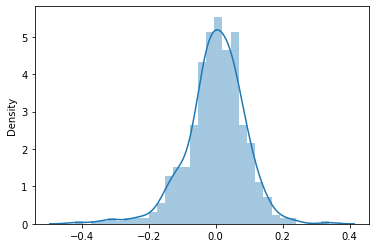

In [ ]:
res=y_train - y_train_pred
sns.distplot(res)

## **5. Predictions and evaluation on the test set**

In [ ]:
#  Create a list of numeric variables
num_vars= ['temp','atemp','hum','windspeed','cnt']

#  Fit on data
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season-2,season-3,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season-2,season-3,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test= df_test.pop('cnt')
X_test= df_test

In [ ]:
# add a constant
X_test_sm= sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season-2,season-3,...,mnth-11,mnth-12,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weathersit-2,weathersit-3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_test_sm= X_test_sm[x]
X_test_sm

,const,yr,holiday,workingday,temp,hum,windspeed,season-2,season-4,mnth-8,mnth-9,mnth-10,weekday-6,weathersit-2,weathersit-3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,1,0.519232,0.756118,0.283397,0,1,0,0,0,0,0,0
127,1.0,0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0,0
640,1.0,1,0,1,0.745598,0.817947,0.052115,0,1,0,0,1,0,1,0
72,1.0,0,0,1,0.331557,0.512107,0.203418,0,0,0,0,0,0,0,0


In [ ]:
# predict
y_test_pred= lr_model.predict(X_test_sm)

In [ ]:
# Evaluate
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8149002944843475
